In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel("data1.xlsx")
df.head()

DAY  VISITS  ORDERS HAS_PURCHASED_PRIOR  DEVICE  BOUNCES  \
0 2013-01-01   64340    2312                   N  iPhone    21755   
1 2013-01-02   63958    2427                   N  iPhone    15675   
2 2013-01-03   67390    2230                   Y  iPhone    28199   
3 2013-01-04   58305    1814                   N  iPhone    24380   
4 2013-01-05   74434    2333                   Y  iPhone    15518   

   ADD_TO_CART  PRODUCT_PAGE_VIEWS  SEARCH_PAGE_VIEWS GENDER  AGE  INCOME      
0        21501               41587              45582      F   24  451529 NaN  
1        21355               41392              45456      F   22  384768 NaN  
2        17086               46559              51972      M   71  283793 NaN  
3        17172               35612              41043      M   51  417355 NaN  
4        19392               44692              55954      F   32   99205 NaN

In [3]:
df = df.drop(df.iloc[:, [12]], axis=1) #drop empty column
df.head()

DAY  VISITS  ORDERS HAS_PURCHASED_PRIOR  DEVICE  BOUNCES  \
0 2013-01-01   64340    2312                   N  iPhone    21755   
1 2013-01-02   63958    2427                   N  iPhone    15675   
2 2013-01-03   67390    2230                   Y  iPhone    28199   
3 2013-01-04   58305    1814                   N  iPhone    24380   
4 2013-01-05   74434    2333                   Y  iPhone    15518   

   ADD_TO_CART  PRODUCT_PAGE_VIEWS  SEARCH_PAGE_VIEWS GENDER  AGE  INCOME  
0        21501               41587              45582      F   24  451529  
1        21355               41392              45456      F   22  384768  
2        17086               46559              51972      M   71  283793  
3        17172               35612              41043      M   51  417355  
4        19392               44692              55954      F   32   99205

In [4]:
#CREATING NEW FEATURES
df["CONVERSION_RATE"] = df["ORDERS"]/df["VISITS"]
df["BOUNCE_RATE"] = df["BOUNCES"]/df["VISITS"]
df["ADD_TO_CART_RATE"] = df["ADD_TO_CART"]/df["VISITS"]
df['d_year'] = df['DAY'].dt.year
df['d_month'] = df['DAY'].dt.month
df['d_week'] = df['DAY'].dt.isocalendar().week
df['d_day'] = df['DAY'].dt.day

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DAY                  5110 non-null   datetime64[ns]
 1   VISITS               5110 non-null   int64         
 2   ORDERS               5110 non-null   int64         
 3   HAS_PURCHASED_PRIOR  5110 non-null   object        
 4   DEVICE               5110 non-null   object        
 5   BOUNCES              5110 non-null   int64         
 6   ADD_TO_CART          5110 non-null   int64         
 7   PRODUCT_PAGE_VIEWS   5110 non-null   int64         
 8   SEARCH_PAGE_VIEWS    5110 non-null   int64         
 9   GENDER               5110 non-null   object        
 10  AGE                  5110 non-null   int64         
 11  INCOME               5110 non-null   int64         
 12  CONVERSION_RATE      5110 non-null   float64       
 13  BOUNCE_RATE          5110 non-nul

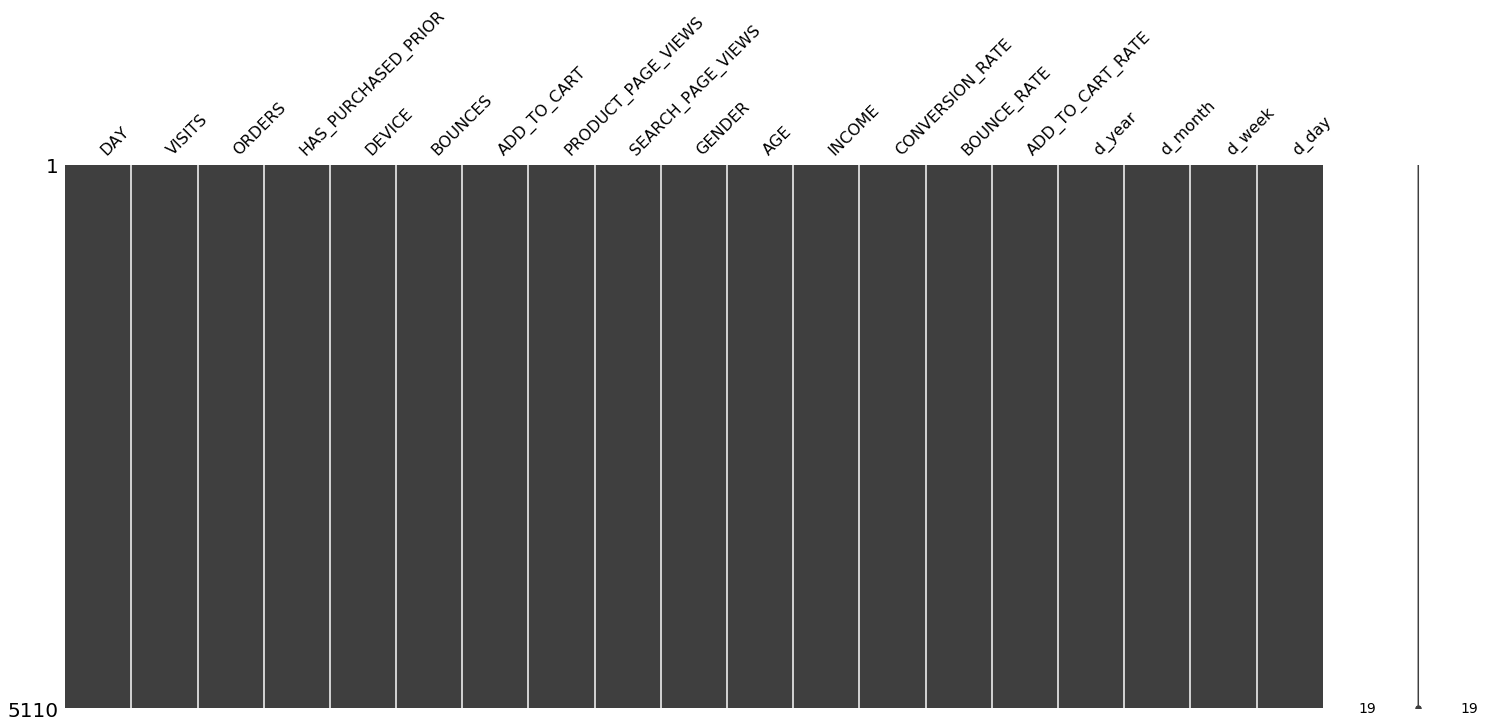

In [6]:
#checking for the missing vslues
import missingno as msno
msno.matrix(df)

In [7]:
#checking for duplicated values
df.duplicated().sum()

0

In [8]:
#output
y= df.INCOME
 
#input
x=df.drop('INCOME',axis=1)
 
#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [9]:
x_train['DEVICE'].unique() #check for categories in devices


array(['Mac', 'Other', 'Android-Tablet', 'iPad', 'iPhone',
       'Android-Phone', 'Windows-PC'], dtype=object)

In [10]:
x_train.describe().T

count           mean            std          min  \
VISITS              3577.0  186376.391389  252916.398465  1518.000000   
ORDERS              3577.0    6532.454012    8922.866494    46.000000   
BOUNCES             3577.0   60929.747833   85815.299515   343.000000   
ADD_TO_CART         3577.0   55749.463517   76142.025024   394.000000   
PRODUCT_PAGE_VIEWS  3577.0  121151.629578  164836.918174   941.000000   
SEARCH_PAGE_VIEWS   3577.0  139715.361197  189739.298760  1068.000000   
AGE                 3577.0      48.889572      18.270811    18.000000   
CONVERSION_RATE     3577.0       0.034992       0.002879     0.030003   
BOUNCE_RATE         3577.0       0.325384       0.072486     0.200373   
ADD_TO_CART_RATE    3577.0       0.299288       0.028794     0.250000   
d_year              3577.0    2013.000000       0.000000  2013.000000   
d_month             3577.0       6.551580       3.432341     1.000000   
d_week              3577.0      26.534806      14.984947     1.000000   
d_day               3577.0      15.632933       8.762097     1.000000   

                             25%           50%            75%           max  
VISITS              23247.000000  60481.000000  287018.000000  824880.00000  
ORDERS                806.000000   2096.000000    9808.000000   32895.00000  
BOUNCES              7098.000000  19041.000000   80445.000000  364980.00000  
ADD_TO_CART          6800.000000  18092.000000   82664.000000  284697.00000  
PRODUCT_PAGE_VIEWS  15037.000000  39679.000000  186134.000000  575068.00000  
SEARCH_PAGE_VIEWS   17241.000000  45661.000000  215374.000000  655291.00000  
AGE                    33.000000     49.000000      65.000000      80.00000  
CONVERSION_RATE         0.032523      0.034977       0.037532       0.04000  
BOUNCE_RATE             0.262318      0.324770       0.388048       0.44999  
ADD_TO_CART_RATE        0.274833      0.298343       0.323737       0.34996  
d_year               2013.000000   2013.000000    2013.000000    2013.00000  
d_month                 4.000000      7.000000      10.000000      12.00000  
d_week                 14.000000     26.000000      39.000000      52.00000  
d_day                   8.000000     16.000000      23.000000      31.00000

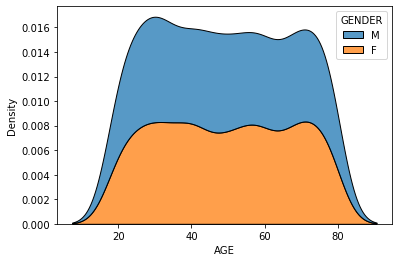

In [11]:
sns.kdeplot(data=x_train, x="AGE", hue="GENDER", multiple="stack")

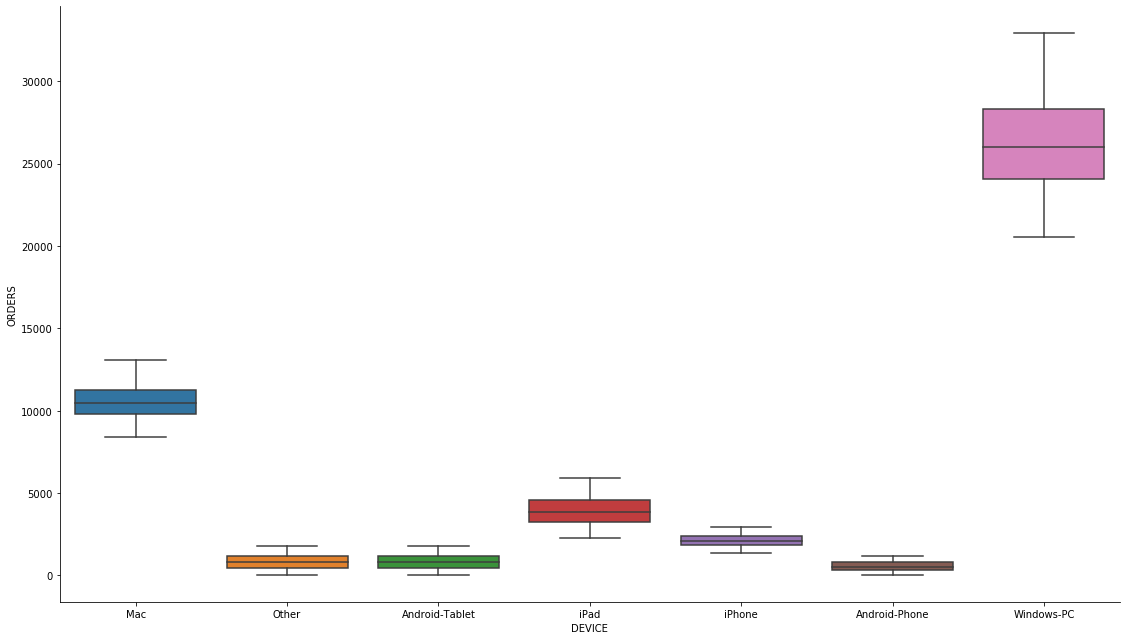

In [12]:
sns.catplot(x="DEVICE", y="ORDERS", kind="box", data=x_train, height=9, aspect=14/8)

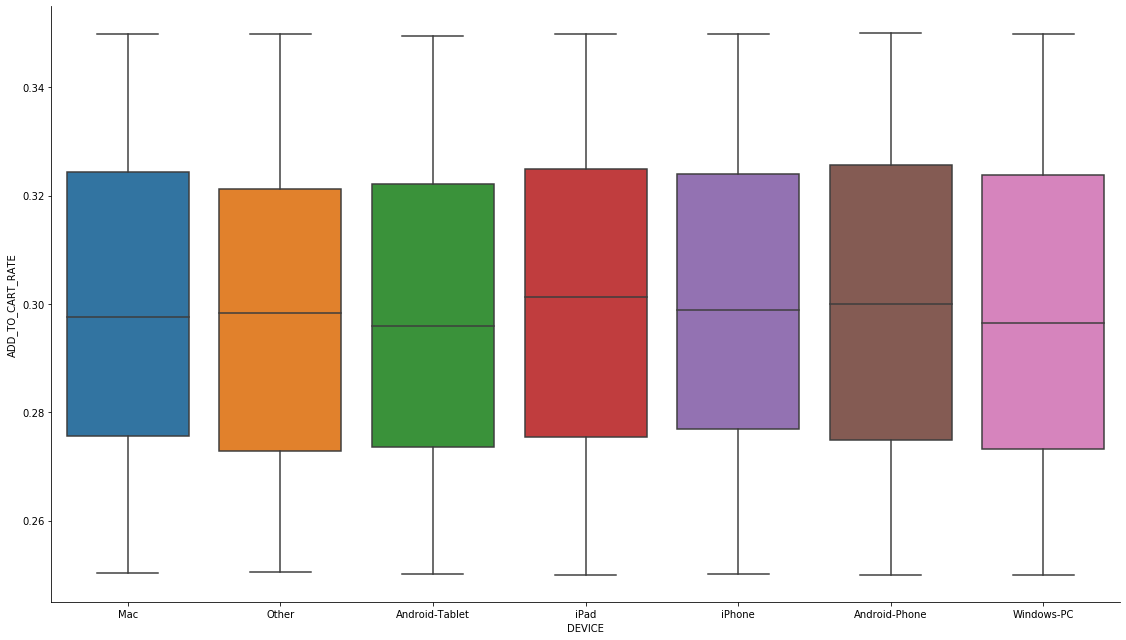

In [13]:
sns.catplot(x="DEVICE", y="ADD_TO_CART_RATE", kind="box", data=x_train, height=9, aspect=14/8)

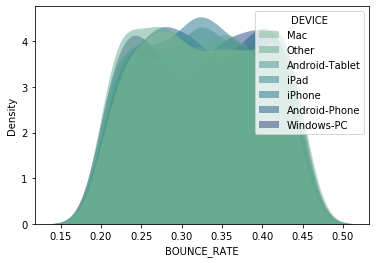

In [14]:
sns.kdeplot(
   data=x_train, x="BOUNCE_RATE", hue="DEVICE",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

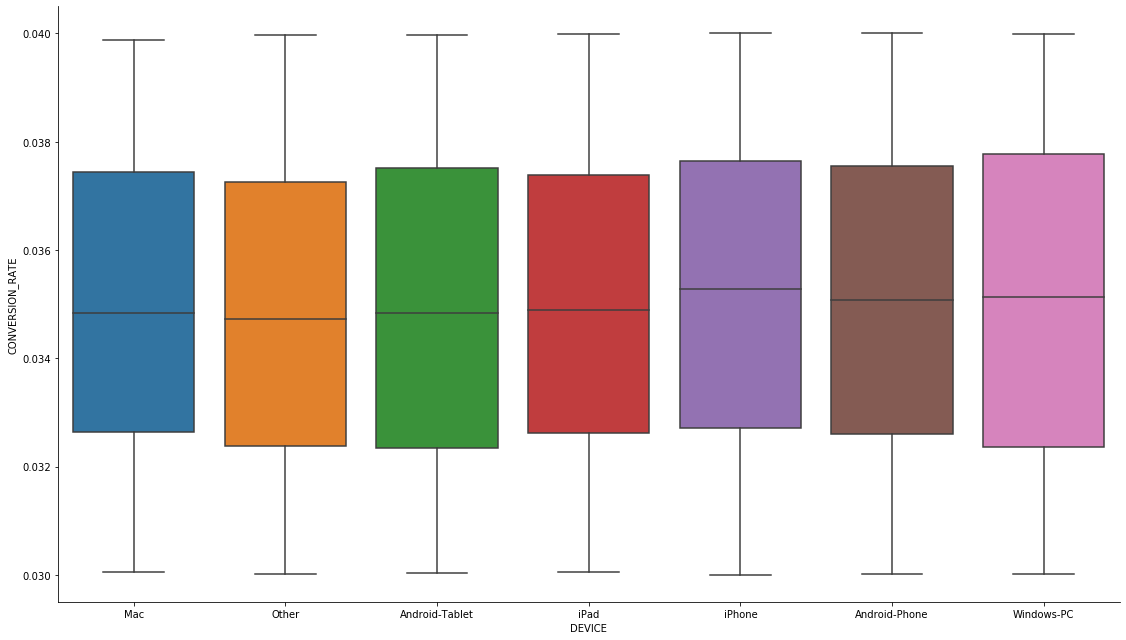

In [15]:
sns.catplot(x="DEVICE", y="CONVERSION_RATE", kind="box", data=x_train, height=9, aspect=14/8)

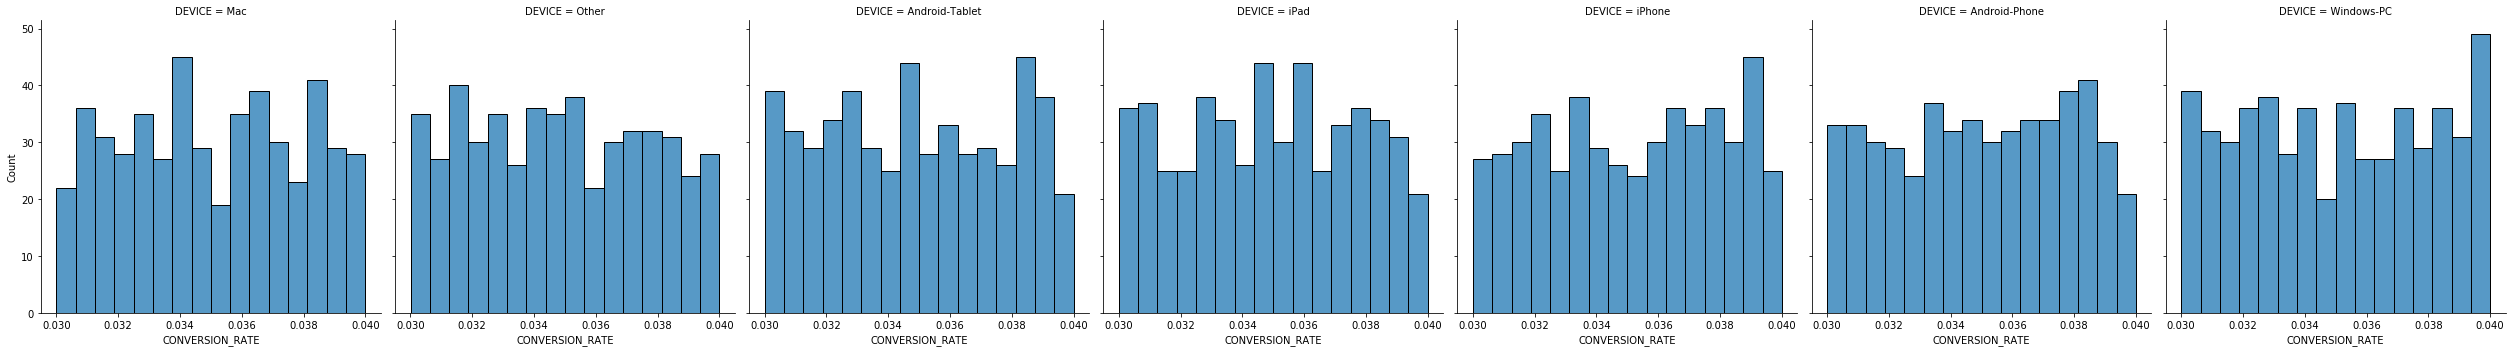

In [16]:
sns.displot(x_train, x="CONVERSION_RATE", col="DEVICE")

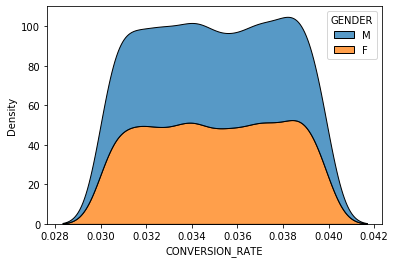

In [17]:
sns.kdeplot(data=x_train, x="CONVERSION_RATE", hue="GENDER", multiple="stack")

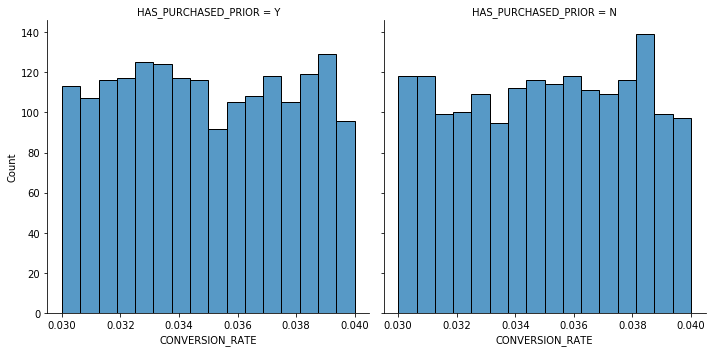

In [18]:
sns.displot(x_train, x="CONVERSION_RATE", col="HAS_PURCHASED_PRIOR")

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


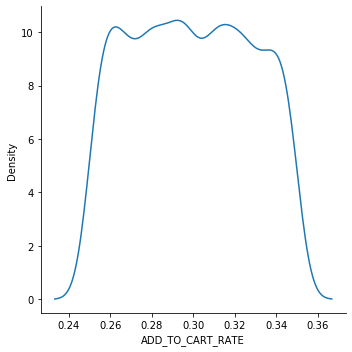

In [19]:
sns.displot(x_train, x="ADD_TO_CART_RATE", kind="kde", palette='winter')

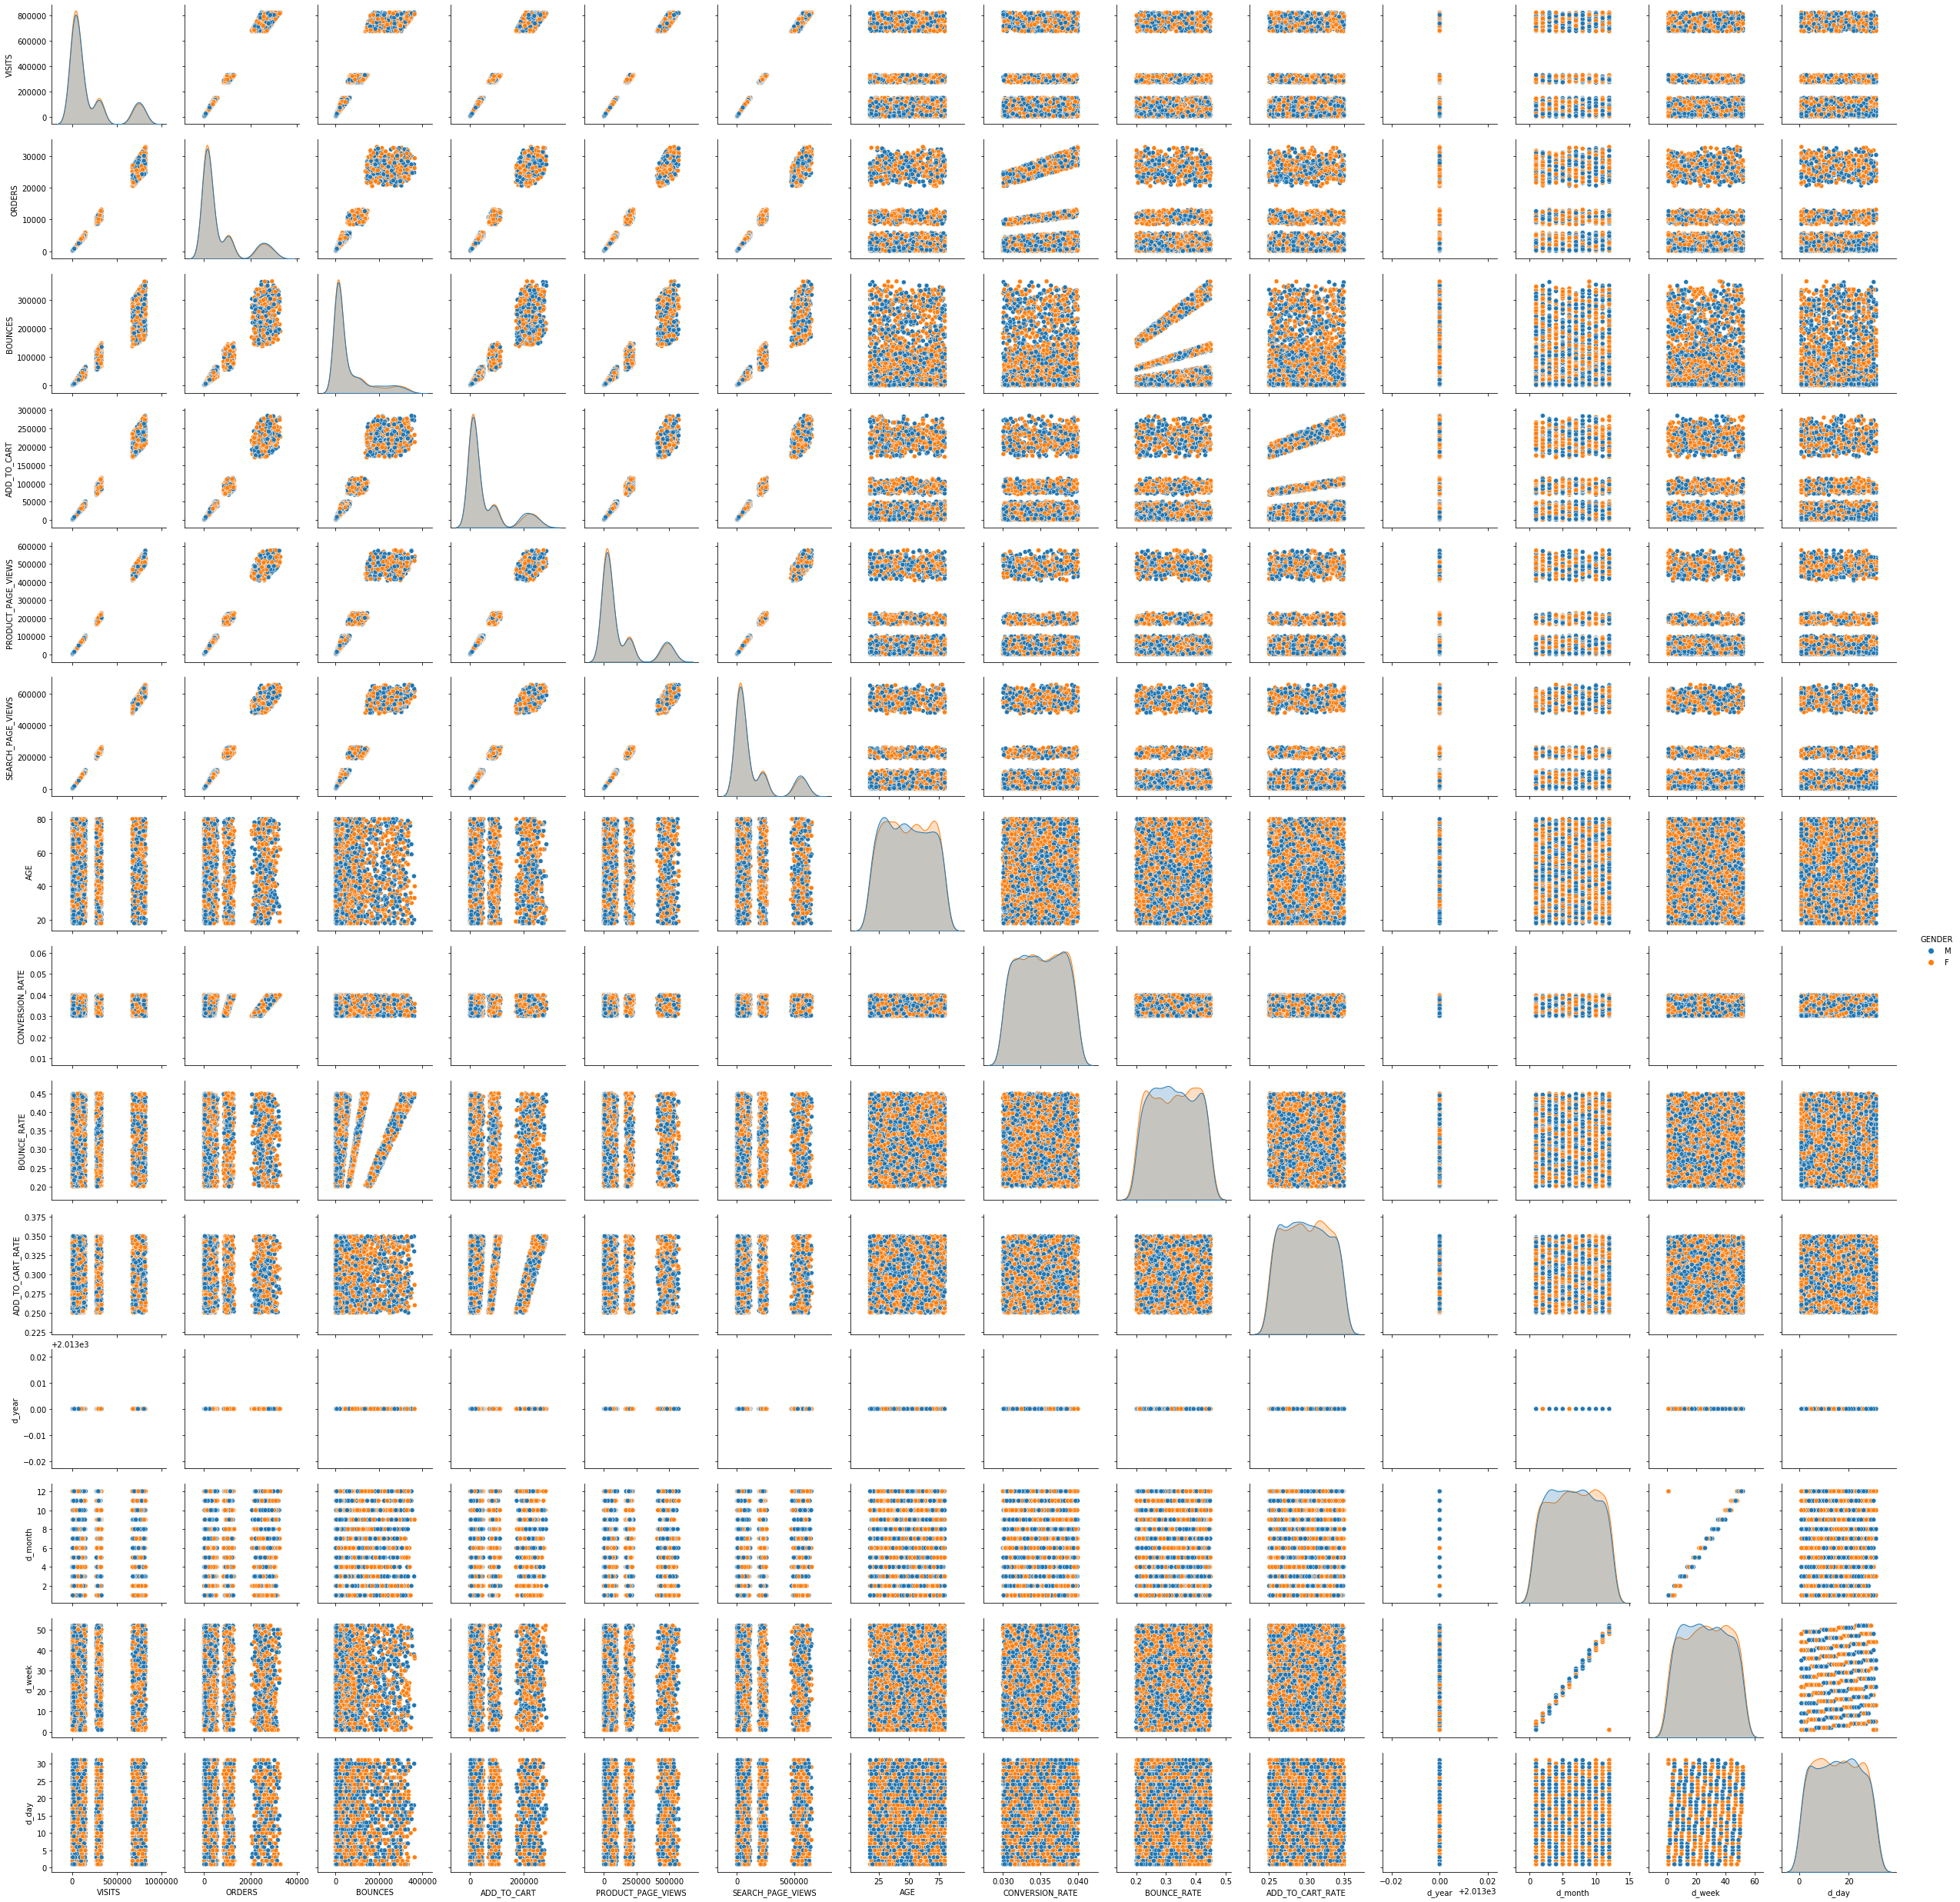

In [20]:
sns.pairplot(x_train, hue="GENDER")

In [21]:
x_train.corr()

VISITS    ORDERS   BOUNCES  ADD_TO_CART  \
VISITS              1.000000  0.994403  0.962345     0.992538   
ORDERS              0.994403  1.000000  0.956834     0.986800   
BOUNCES             0.962345  0.956834  1.000000     0.956496   
ADD_TO_CART         0.992538  0.986800  0.956496     1.000000   
PRODUCT_PAGE_VIEWS  0.998454  0.993121  0.960233     0.991061   
SEARCH_PAGE_VIEWS   0.998799  0.993154  0.961522     0.991567   
AGE                -0.009986 -0.007627 -0.004058    -0.015215   
CONVERSION_RATE     0.014728  0.077801  0.013267     0.013556   
BOUNCE_RATE         0.015592  0.015138  0.178301     0.017494   
ADD_TO_CART_RATE   -0.004229 -0.005121  0.000396     0.069137   
d_year                   NaN       NaN       NaN          NaN   
d_month            -0.006151 -0.006777 -0.003458    -0.005539   
d_week             -0.005915 -0.006387 -0.003213    -0.005706   
d_day               0.000326  0.000448  0.003374     0.001433   

                    PRODUCT_PAGE_VIEWS  SEARCH_PAGE_VIEWS       AGE  \
VISITS                        0.998454           0.998799 -0.009986   
ORDERS                        0.993121           0.993154 -0.007627   
BOUNCES                       0.960233           0.961522 -0.004058   
ADD_TO_CART                   0.991061           0.991567 -0.015215   
PRODUCT_PAGE_VIEWS            1.000000           0.997243 -0.009750   
SEARCH_PAGE_VIEWS             0.997243           1.000000 -0.010959   
AGE                          -0.009750          -0.010959  1.000000   
CONVERSION_RATE               0.016203           0.014469 -0.018597   
BOUNCE_RATE                   0.014249           0.016298  0.021654   
ADD_TO_CART_RATE             -0.003482          -0.003170 -0.012388   
d_year                             NaN                NaN       NaN   
d_month                      -0.007556          -0.006448 -0.014685   
d_week                       -0.007381          -0.006580 -0.016814   
d_day                         0.000708          -0.000060 -0.029173   

                    CONVERSION_RATE  BOUNCE_RATE  ADD_TO_CART_RATE  d_year  \
VISITS                     0.014728     0.015592         -0.004229     NaN   
ORDERS                     0.077801     0.015138         -0.005121     NaN   
BOUNCES                    0.013267     0.178301          0.000396     NaN   
ADD_TO_CART                0.013556     0.017494          0.069137     NaN   
PRODUCT_PAGE_VIEWS         0.016203     0.014249         -0.003482     NaN   
SEARCH_PAGE_VIEWS          0.014469     0.016298         -0.003170     NaN   
AGE                       -0.018597     0.021654         -0.012388     NaN   
CONVERSION_RATE            1.000000     0.002280         -0.017147     NaN   
BOUNCE_RATE                0.002280     1.000000          0.001887     NaN   
ADD_TO_CART_RATE          -0.017147     0.001887          1.000000     NaN   
d_year                          NaN          NaN               NaN     NaN   
d_month                   -0.003175     0.018369          0.007210     NaN   
d_week                     0.000027     0.020875          0.010587     NaN   
d_day                     -0.004483     0.005837         -0.006486     NaN   

                     d_month    d_week     d_day  
VISITS             -0.006151 -0.005915  0.000326  
ORDERS             -0.006777 -0.006387  0.000448  
BOUNCES            -0.003458 -0.003213  0.003374  
ADD_TO_CART        -0.005539 -0.005706  0.001433  
PRODUCT_PAGE_VIEWS -0.007556 -0.007381  0.000708  
SEARCH_PAGE_VIEWS  -0.006448 -0.006580 -0.000060  
AGE                -0.014685 -0.016814 -0.029173  
CONVERSION_RATE    -0.003175  0.000027 -0.004483  
BOUNCE_RATE         0.018369  0.020875  0.005837  
ADD_TO_CART_RATE    0.007210  0.010587 -0.006486  
d_year                   NaN       NaN       NaN  
d_month             1.000000  0.967475  0.012917  
d_week              0.967475  1.000000  0.064606  
d_day               0.012917  0.064606  1.000000

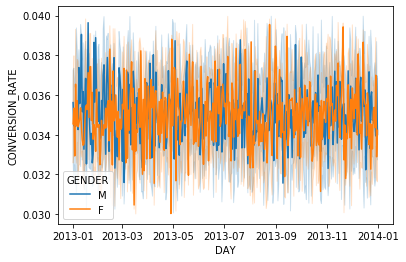

In [22]:
sns.lineplot(x="DAY", y="CONVERSION_RATE", data=x_train,hue="GENDER")

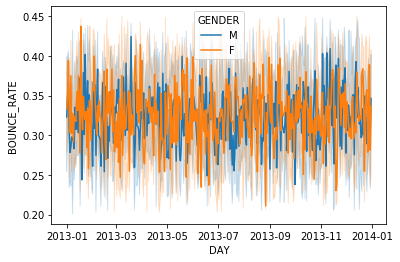

In [23]:
sns.lineplot(x="DAY", y="BOUNCE_RATE", data=x_train,hue="GENDER")

In [24]:
x_train.skew()

/tmp/ipykernel_1020/3264251667.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  x_train.skew()


VISITS                1.529834
ORDERS                1.573202
BOUNCES               1.771234
ADD_TO_CART           1.581305
PRODUCT_PAGE_VIEWS    1.544718
SEARCH_PAGE_VIEWS     1.537402
AGE                   0.027846
CONVERSION_RATE      -0.013994
BOUNCE_RATE          -0.003242
ADD_TO_CART_RATE      0.025220
d_year                0.000000
d_month              -0.013405
d_week               -0.004594
d_day                 0.013805
dtype: float64

In [25]:
y_train

1559     86105
1705    100530
2390    171777
3771    232864
3692    224006
         ...  
4130     76653
4002    377385
4861    450088
812      22419
4620     60525
Name: INCOME, Length: 3577, dtype: int64

In [26]:
#identify all categorical variables
cat_columns = x_train.select_dtypes(['object']).columns

#convert all categorical variables to numeric
x_train[cat_columns] = x_train[cat_columns].apply(lambda x: pd.factorize(x)[0])
x_train.head()

DAY  VISITS  ORDERS  HAS_PURCHASED_PRIOR  DEVICE  BOUNCES  \
1559 2013-04-10  296836   10587                    0       0   128823   
1705 2013-09-03  298334   10792                    0       0    92496   
2390 2013-07-20   26313    1016                    0       1     7506   
3771 2013-05-02   13637     475                    1       2     3006   
3692 2013-02-12    5609     218                    0       2     1794   

      ADD_TO_CART  PRODUCT_PAGE_VIEWS  SEARCH_PAGE_VIEWS  GENDER  AGE  \
1559        90787              193862             232376       0   31   
1705        89128              189634             238185       0   75   
2390         7711               18168              19656       1   50   
3771         3803                8218              10783       0   35   
3692         1957                3895               4000       1   32   

      CONVERSION_RATE  BOUNCE_RATE  ADD_TO_CART_RATE  d_year  d_month  d_week  \
1559         0.035666     0.433987          0.305849    2013        4      15   
1705         0.036174     0.310042          0.298752    2013        9      36   
2390         0.038612     0.285258          0.293049    2013        7      29   
3771         0.034832     0.220430          0.278874    2013        5      18   
3692         0.038866     0.319843          0.348904    2013        2       7   

      d_day  
1559     10  
1705      3  
2390     20  
3771      2  
3692     12

In [27]:
#drop day column
x_train = x_train.drop(df.iloc[:, [0]], axis=1) #drop day column
x_train.head()

VISITS  ORDERS  HAS_PURCHASED_PRIOR  DEVICE  BOUNCES  ADD_TO_CART  \
1559  296836   10587                    0       0   128823        90787   
1705  298334   10792                    0       0    92496        89128   
2390   26313    1016                    0       1     7506         7711   
3771   13637     475                    1       2     3006         3803   
3692    5609     218                    0       2     1794         1957   

      PRODUCT_PAGE_VIEWS  SEARCH_PAGE_VIEWS  GENDER  AGE  CONVERSION_RATE  \
1559              193862             232376       0   31         0.035666   
1705              189634             238185       0   75         0.036174   
2390               18168              19656       1   50         0.038612   
3771                8218              10783       0   35         0.034832   
3692                3895               4000       1   32         0.038866   

      BOUNCE_RATE  ADD_TO_CART_RATE  d_year  d_month  d_week  d_day  
1559     0.433987          0.305849    2013        4      15     10  
1705     0.310042          0.298752    2013        9      36      3  
2390     0.285258          0.293049    2013        7      29     20  
3771     0.220430          0.278874    2013        5      18      2  
3692     0.319843          0.348904    2013        2       7     12

In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 1559 to 4620
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   VISITS               3577 non-null   int64  
 1   ORDERS               3577 non-null   int64  
 2   HAS_PURCHASED_PRIOR  3577 non-null   int64  
 3   DEVICE               3577 non-null   int64  
 4   BOUNCES              3577 non-null   int64  
 5   ADD_TO_CART          3577 non-null   int64  
 6   PRODUCT_PAGE_VIEWS   3577 non-null   int64  
 7   SEARCH_PAGE_VIEWS    3577 non-null   int64  
 8   GENDER               3577 non-null   int64  
 9   AGE                  3577 non-null   int64  
 10  CONVERSION_RATE      3577 non-null   float64
 11  BOUNCE_RATE          3577 non-null   float64
 12  ADD_TO_CART_RATE     3577 non-null   float64
 13  d_year               3577 non-null   int64  
 14  d_month              3577 non-null   int64  
 15  d_week               3577 non-null 

In [29]:
for col in x_train.columns:
    print(col)

VISITS
ORDERS
HAS_PURCHASED_PRIOR
DEVICE
BOUNCES
ADD_TO_CART
PRODUCT_PAGE_VIEWS
SEARCH_PAGE_VIEWS
GENDER
AGE
CONVERSION_RATE
BOUNCE_RATE
ADD_TO_CART_RATE
d_year
d_month
d_week
d_day


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(x_train.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'VISITS', 'ORDERS',  'HAS_PURCHASED_PRIOR','DEVICE','BOUNCES', 'ADD_TO_CART', 'PRODUCT_PAGE_VIEWS', 'SEARCH_PAGE_VIEWS','GENDER','AGE','CONVERSION_RATE', 'BOUNCE_RATE', 'ADD_TO_CART_RATE', 'd_year','d_month', 'd_week','d_day'])
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()

Scaled Dataset Using MinMaxScaler


VISITS    ORDERS  HAS_PURCHASED_PRIOR    DEVICE   BOUNCES  ADD_TO_CART  \
0  0.358673  0.320893                  0.0  0.000000  0.352350     0.317946   
1  0.360493  0.327133                  0.0  0.000000  0.252725     0.312111   
2  0.030114  0.029529                  0.0  0.166667  0.019644     0.025737   
3  0.014719  0.013060                  1.0  0.333333  0.007303     0.011991   
4  0.004969  0.005236                  0.0  0.333333  0.003979     0.005498   

   PRODUCT_PAGE_VIEWS  SEARCH_PAGE_VIEWS  GENDER       AGE  CONVERSION_RATE  \
0            0.336025           0.353561     0.0  0.209677         0.566467   
1            0.328661           0.362441     0.0  0.919355         0.617291   
2            0.030006           0.028412     1.0  0.516129         0.861162   
3            0.012675           0.014850     0.0  0.274194         0.482993   
4            0.005145           0.004482     1.0  0.225806         0.886572   

   BOUNCE_RATE  ADD_TO_CART_RATE  d_year   d_month    d_week     d_day  
0     0.935889          0.558716     0.0  0.272727  0.274510  0.300000  
1     0.439348          0.487721     0.0  0.727273  0.686275  0.066667  
2     0.340062          0.430665     0.0  0.545455  0.549020  0.633333  
3     0.080351          0.288853     0.0  0.363636  0.333333  0.033333  
4     0.478613          0.989436     0.0  0.090909  0.117647  0.366667

In [31]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'


# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('XG', GradientBoostingRegressor()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, df_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



LR: -19550821684.779442 (1120360515.387758)


/home/osumo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.152e+13, tolerance: 6.260e+09
  model = cd_fast.enet_coordinate_descent(
/home/osumo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e+13, tolerance: 6.167e+09
  model = cd_fast.enet_coordinate_descent(
/home/osumo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.292e+

LASSO: -19548960301.723412 (1120240817.434128)
EN: -19439168554.292442 (1075169589.599950)
KNN: -23319267412.272205 (1402805093.958147)
CART: -40115396497.053337 (2501265704.046886)
SVR: -19436417802.449360 (1046644138.302346)
XG: -20002066018.521919 (1141325004.231998)


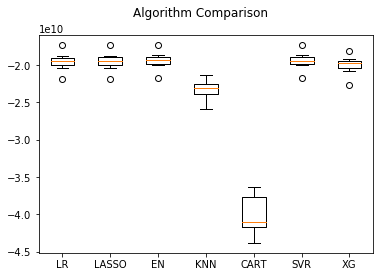

In [32]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from numpy import mean
from numpy import std
from numpy import absolute
# define model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, df_scaled, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 120726.449 (3456.126)


Feature: 0, Score: -876.59325
Feature: 1, Score: -859.84517
Feature: 2, Score: -1301.74965
Feature: 3, Score: -623.56500
Feature: 4, Score: -790.74884
Feature: 5, Score: -866.68734
Feature: 6, Score: -791.67501
Feature: 7, Score: -751.20330
Feature: 8, Score: -234.22810
Feature: 9, Score: -290.35086
Feature: 10, Score: -157.34021
Feature: 11, Score: -1067.05567
Feature: 12, Score: 260.99342
Feature: 13, Score: 0.00000
Feature: 14, Score: 22.23419
Feature: 15, Score: 426.54625
Feature: 16, Score: 292.89260


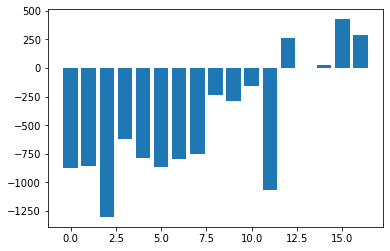

In [38]:
model.fit(df_scaled, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()